**Load data**

In [5]:
import pandas as pd

In [6]:
true_df = pd.read_csv('artifacts\data\True.csv',encoding='ISO-8859-1',on_bad_lines='skip',engine='python')

In [7]:
fake_df = pd.read_csv('artifacts\data\Fake.csv',encoding='ISO-8859-1',on_bad_lines='skip',engine='python')

In [8]:
fake_df['label'] = 1
true_df['label'] = 0

In [9]:
df = pd.concat([true_df,fake_df],ignore_index=True)

In [10]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [11]:
df.shape

(44897, 5)

In [12]:
df.describe(include='all')

,title,text,subject,date,label
count,44897,44897,44897,44897,44897.000000
unique,38728,38645,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11271,182,NaN
mean,NaN,NaN,NaN,NaN,0.522997
std,NaN,NaN,NaN,NaN,0.499476
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


**Missing Value Handeling**

In [13]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [23]:
df.shape 

(44897, 5)

##### Train Test Split 

In [32]:
from sklearn.model_selection import train_test_split 

In [37]:
train , test =train_test_split(df,test_size=0.1,shuffle=True) 

In [40]:
train['label'].value_counts()

label
1    21142
0    19264
Name: count, dtype: int64

In [41]:
test['label'].value_counts()

label
1    2338
0    2152
Name: count, dtype: int64

**Text Preprocessing**

In [14]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
lemmatizer = WordNetLemmatizer()

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [20]:
clean_text(df['text'][1])

  0%|          | 0.00/53.2M [52:35<?, ?B/s]


'washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan 1 justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb 21 submit plan trump lawyer representing currently serving transgender service member aspiring recruit said expected 

In [43]:
df.to_csv("df.csv")

**EDA**

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


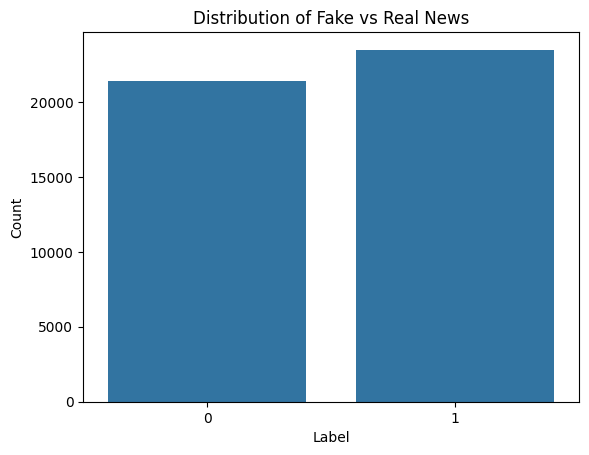

In [45]:
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real News')
plt.show()

**Text Vectorization**

In [47]:
train = train[['text','label']]

In [93]:
train['label'].shape

(40406,)

In [94]:
train['text'].shape

(40406,)

In [95]:
x_train,x_valid,y_train,y_valid = train_test_split(train['text'], train['label'],test_size=0.1)

In [96]:
print("x_train Shape :", x_train.shape)
print("X_valid Shape :", x_valid.shape)

x_train Shape : (36365,)
X_valid Shape : (4041,)


In [97]:
print("Y_train Shape :", y_train.shape)
print("Y_valid Shape :", y_valid.shape)

Y_train Shape : (36365,)
Y_valid Shape : (4041,)


In [98]:
from sklearn.feature_extraction.text import CountVectorizer 

In [99]:
tf = CountVectorizer()

In [100]:
tf.fit(x_train)

CountVectorizer()

In [101]:
x_train = tf.transform(x_train)
x_valid = tf.transform(x_valid)

**Model Buliding**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import mlflow 
import dagshub  
import optuna 

In [103]:

dagshub.init(repo_owner='Siddhudhole', repo_name='Fake-News-Prediction-End-to-End', mlflow=True) 

Initialized MLflow to track repo "Siddhudhole/Fake-News-Prediction-End-to-End"

Repository Siddhudhole/Fake-News-Prediction-End-to-End initialized!

In [104]:
mlflow.set_experiment("Fake_News_Prediction")
mlflow.set_tracking_uri("https://dagshub.com/Siddhudhole/Fake-News-Prediction-End-to-End.mlflow")

In [105]:
def evaluate_model(y_test,y_pred):
    try :
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        return accuracy, precision, recall
    except Exception as e:
        return str(e) 

In [106]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,100)
    criterion = trial.suggest_categorical('criterion',choices=['gini','entropy','log_loss'])
    max_depth = trial.suggest_int('max_depth',1,10) 
    random_state = 42
    max_features = trial.suggest_categorical('max_features',choices=['sqrt','log2'])
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,max_depth=max_depth, 
                                       random_state=random_state,max_features=max_features)
    model.fit(x_train,y_train)
    y_preds = model.predict(x_valid) 
    accuracy = accuracy_score(y_true=y_valid,y_pred=y_preds)
    return accuracy

In [107]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20) 

[I 2024-10-08 23:32:42,834] A new study created in memory with name: no-name-bb531624-30d2-4101-83b0-5f9fce109d72
[I 2024-10-08 23:32:44,130] Trial 0 finished with value: 0.5981192774065826 and parameters: {'n_estimators': 72, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.5981192774065826.
[I 2024-10-08 23:32:45,269] Trial 1 finished with value: 0.526354862657758 and parameters: {'n_estimators': 80, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.5981192774065826.
[I 2024-10-08 23:32:50,179] Trial 2 finished with value: 0.9683246721108636 and parameters: {'n_estimators': 97, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9683246721108636.
[I 2024-10-08 23:32:50,815] Trial 3 finished with value: 0.8408809700569166 and parameters: {'n_estimators': 12, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.968

In [109]:
with mlflow.start_run(run_name='SiddharthDhole') as run:

                
        model = RandomForestClassifier(n_estimators=study.best_params['n_estimators'],criterion=study.best_params['criterion'], 
                                       max_depth=study.best_params['max_depth'], 
                                        random_state=42,max_features=study.best_params['max_features'])
        model.fit(x_train,y_train)
        y_pred = model.predict(x_valid) 
                
        mlflow.log_param('n_estimators',study.best_params['n_estimators'])
        mlflow.log_param('criterion',study.best_params['criterion'])
        mlflow.log_param('max_depth',study.best_params['max_depth'])
        mlflow.log_param('max_features',study.best_params['max_features'])
        accuracy, precision, recall  = evaluate_model(y_test=y_valid,y_pred=y_pred)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
                    # Log the sklearn model and register as version 1
        mlflow.sklearn.log_model(sk_model=model,registered_model_name="fake-news-prediction-model",artifact_path='artifacts/fake-news-prediction')

2024/10/08 23:35:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'fake-news-prediction-model'.
2024/10/08 23:36:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: fake-news-prediction-model, version 1
Created version '1' of model 'fake-news-prediction-model'.
2024/10/08 23:36:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run SiddharthDhole at: https://dagshub.com/Siddhudhole/Fake-News-Prediction-End-to-End.mlflow/#/experiments/0/runs/8bfe8617f1f048699778a59b439ae85f.
2024/10/08 23:36:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Siddhudhole/Fake-News-Prediction-End-to-End.mlflow/#/experiments/0.
